<h1>Linear Regression</h1> 


<h3 span style='color:yellow'>Pytorch training Pipeline:</h3>
<ul>
<li style="color:yellow;"><span style="font-size:18px;">Importing libraries.</span></li>
<li style="color:yellow;"><span style="font-size:18px;">Design the model by specifying the number of inputs and outputs, and by crafting the forward pass with various operations and layers: Design the model (inputs, outputs, forward pass).</span></li>
<li style="color:yellow;"><span style="font-size:18px;">Construct loss and optimizer.</span></li>
<li style="color:yellow; font-size:18px;">Implement the training loop:</li>
  <ul>
  <li style="color:yellow;"><span style="font-size:18px;">Initialization: Start with initial guesses for weights.</span></li>
  <li style="color:yellow;"><span style="font-size:18px;">Forward pass: Compute the predicted outputs by passing the inputs through the model.</span></li>
  <li style="color:yellow;"><span style="font-size:18px;">Compute Loss: Evaluate the error of the predicted output against the actual output using the loss function.</span></li>
  <li style="color:yellow;"><span style="font-size:18px;">Backward pass (Backpropagation): Compute the gradients of the loss with respect to the model parameters.</span></li>
  <li style="color:yellow;"><span style="font-size:18px;">Update weights: Adjust the model parameters (weights and biases) using a predetermined optimization algorithm like Stochastic Gradient Descent (SGD) or Adam.</span></li>
  <li style="color:yellow;"><span style="font-size:18px;">Evaluate: Periodically check the model performance on the validation set.</span></li>
  <li style="color:yellow;"><span style="font-size:18px;">Repeat: Until the performance on the validation set stops improving or after a fixed number of iterations.</span></li>
  </ul>
</ul>


In [1]:
# Importing libraries
import torch
import torch.nn as nn
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data prepreparation
X_numpy, y_numpy=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1234)
type(X_numpy[0][0])

numpy.float64

In [3]:
# numpy to tensor flow conversion
X=torch.from_numpy(X_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))
y.shape


torch.Size([100])

In [4]:
# In the machine learning tutorial, we didn't use PyTorch and therefore didn't reshape y. However, for this case, y should be reshaped from a row vector to a column vector
y=y.view(y.shape[0],1)
n_samples,n_features=X.shape


In [5]:
# Model setting up
# The built-in linear model is used from ttorch.nn

input_size=n_features
output_size=1   # we want to map the feature values (points) into one output value for linear regression
model=nn.Linear(input_size,output_size)

In [6]:
# Loss and optimizer
LR=0.01
EPOCHS=100
loss_fn=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=LR)

In [7]:
# Optimization loop
for epoch in range(EPOCHS):
    # Forward pass
    y_predicted=model(X)
    # Loss
    loss=loss_fn(y_predicted,y)
    # Backpropagation
    loss.backward()
  
    optimizer.step()
    #The .grad attribute accumulates the gradients, so we need to clear them using the following line of code 
    optimizer.zero_grad()

    if epoch%2==0:
        [w,b]=model.parameters()
        print(f'epoch: {epoch+1}|| Loss: {loss.item():.4f} || Weights: {w[0]} ')


epoch: 1|| Loss: 7919.3320 || Weights: tensor([2.2402], grad_fn=<SelectBackward0>) 
epoch: 3|| Loss: 7332.4863 || Weights: tensor([5.6121], grad_fn=<SelectBackward0>) 
epoch: 5|| Loss: 6790.9927 || Weights: tensor([8.8512], grad_fn=<SelectBackward0>) 
epoch: 7|| Loss: 6291.3408 || Weights: tensor([11.9629], grad_fn=<SelectBackward0>) 
epoch: 9|| Loss: 5830.2949 || Weights: tensor([14.9521], grad_fn=<SelectBackward0>) 
epoch: 11|| Loss: 5404.8682 || Weights: tensor([17.8236], grad_fn=<SelectBackward0>) 
epoch: 13|| Loss: 5012.3052 || Weights: tensor([20.5822], grad_fn=<SelectBackward0>) 
epoch: 15|| Loss: 4650.0645 || Weights: tensor([23.2322], grad_fn=<SelectBackward0>) 
epoch: 17|| Loss: 4315.8008 || Weights: tensor([25.7779], grad_fn=<SelectBackward0>) 
epoch: 19|| Loss: 4007.3513 || Weights: tensor([28.2234], grad_fn=<SelectBackward0>) 
epoch: 21|| Loss: 3722.7197 || Weights: tensor([30.5727], grad_fn=<SelectBackward0>) 
epoch: 23|| Loss: 3460.0649 || Weights: tensor([32.8296], grad

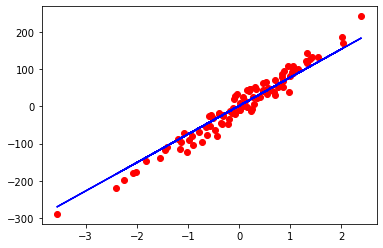

In [12]:
# Inference: note th eprediction should be converted to numpy for pltting and post processing
prediction=model(X).detach().numpy()  # We need to detach this operation beacuse we do not need it to be a prat form the computational graph because it has the attribute require_grad=True\
plt.plot(X_numpy[:,0],y_numpy,'ro') # plot as red dot
plt.plot(X_numpy[:,0],prediction,'b')
plt.show()

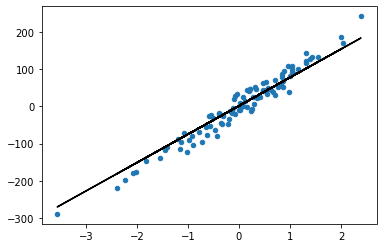

In [84]:
plt.scatter(X_numpy[:,0],y_numpy,marker='o',s=20,label='Train')
plt.plot(X[:,0],prediction,color='k')